<a href="https://colab.research.google.com/github/mjavadpur/PandasNumpy/blob/main/PandasNumpy_Ses4_MJavadpur2Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
HOME = '/content/drive/MyDrive/Workshop/PandasNumpy/Session4/' #@param {type:"string"}

# Time series Analysis

Trend
& Seasonality & cyclic

stationary


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(HOME + 'Netflix.csv')
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume,Date
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002
...,...,...,...,...,...,...,...
5236,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,3/13/2023
5237,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,3/14/2023
5238,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,3/15/2023
5239,304.750000,316.600006,301.709992,310.059998,310.059998,7903700.0,3/16/2023


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5241 entries, 0 to 5240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5241 non-null   float64
 1   High       5239 non-null   float64
 2   Low        5239 non-null   float64
 3   Close      5240 non-null   float64
 4   Adj Close  5241 non-null   float64
 5   Volume     5240 non-null   float64
 6   Date       5241 non-null   object 
dtypes: float64(6), object(1)
memory usage: 286.7+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5241.000000,5239.000000,5239.000000,5240.000000,5241.000000,5.240000e+03
mean,122.076674,124.041337,120.122170,122.113326,122.090193,1.628220e+07
std,168.295608,170.756922,165.681922,168.253448,168.245728,1.896140e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.038571,4.122143,3.950714,4.035714,4.035714,6.178700e+06
50%,30.442858,31.018572,29.857143,30.430000,30.415714,1.042540e+07
75%,191.610001,194.490005,187.675003,190.867504,190.850006,1.939578e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


# **Manage Missing Values**

In [8]:
df.isnull().sum()

Open         0
High         2
Low          2
Close        1
Adj Close    0
Volume       1
Date         0
dtype: int64

In [9]:
df.interpolate(inplace = True)

In [10]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

<Axes: >

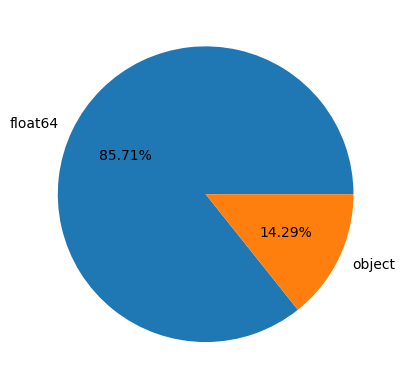

In [11]:
df.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: >

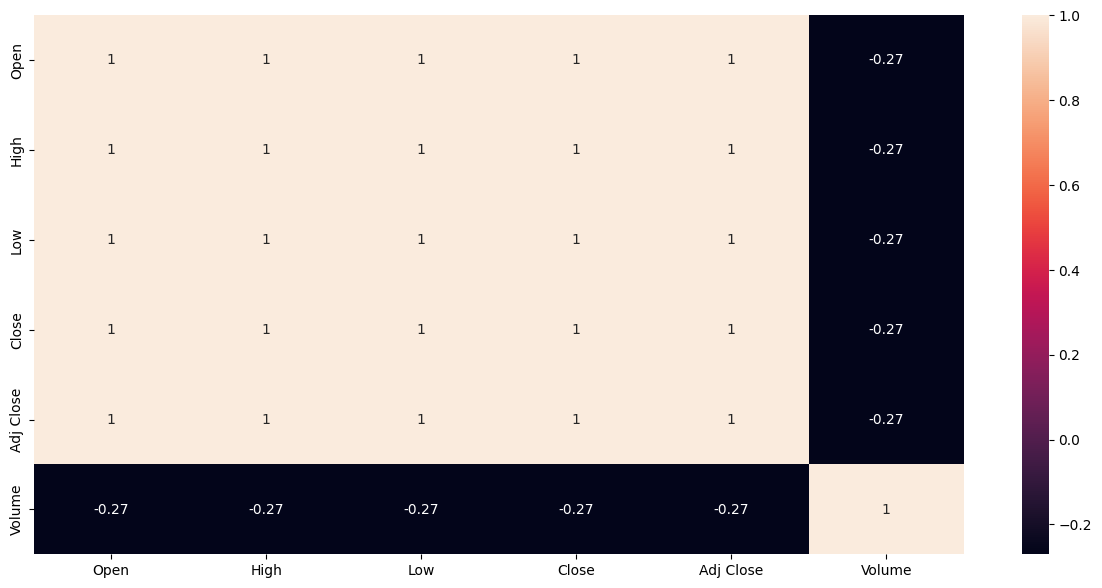

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),cbar=True,annot=True)

In [13]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999849,0.999848,0.999674,0.999674,-0.269004
High,0.999849,1.000000,0.999806,0.999856,0.999856,-0.267662
Low,0.999848,0.999806,1.000000,0.999845,0.999845,-0.270438
Close,0.999674,0.999856,0.999845,1.000000,1.000000,-0.268879
Adj Close,0.999674,0.999856,0.999845,1.000000,1.000000,-0.268879
Volume,-0.269004,-0.267662,-0.270438,-0.268879,-0.268879,1.000000


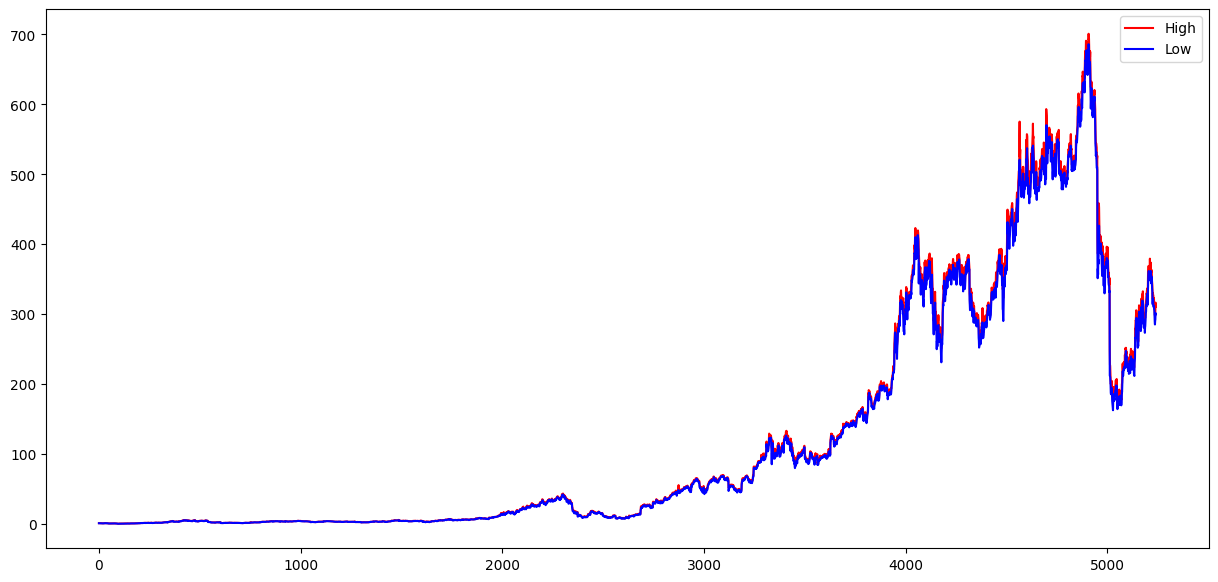

In [14]:
plt.figure(figsize=(15,7))
plt.plot(df['High'], color='r', label = 'High')
plt.plot(df['Low'], color='b', label = 'Low')
# plt.plot(df['Adj Close'], color='g', label = 'Adj Close')

plt.legend()
plt.show()

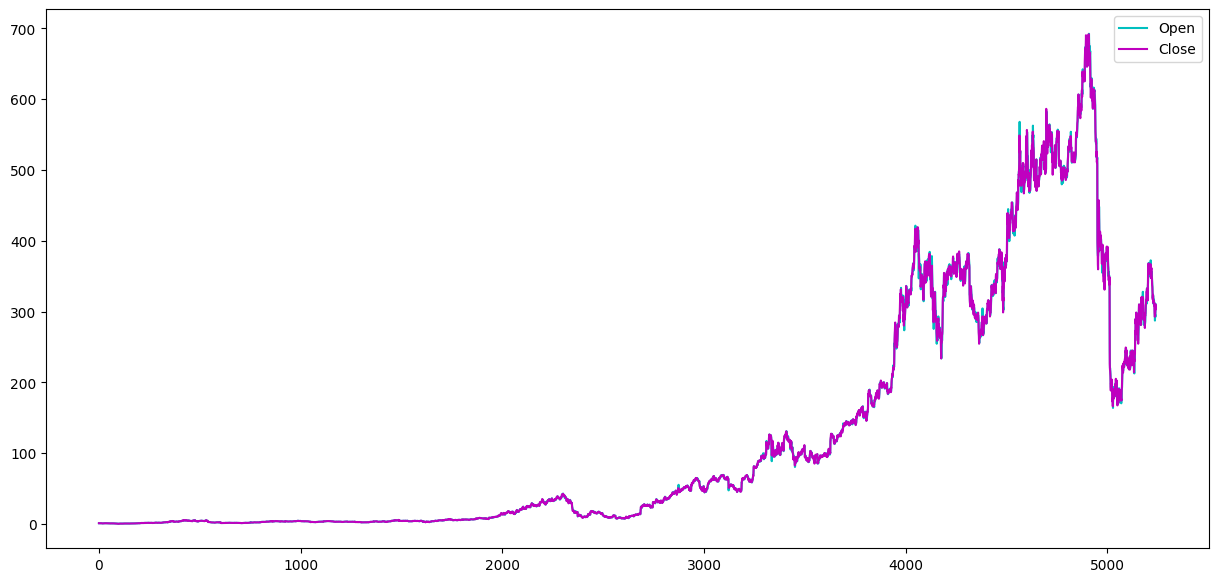

In [15]:
plt.figure(figsize=(15,7))
plt.plot(df['Open'], color='c', label = 'Open')
plt.plot(df['Close'], color='m', label = 'Close')
plt.legend()
plt.show()

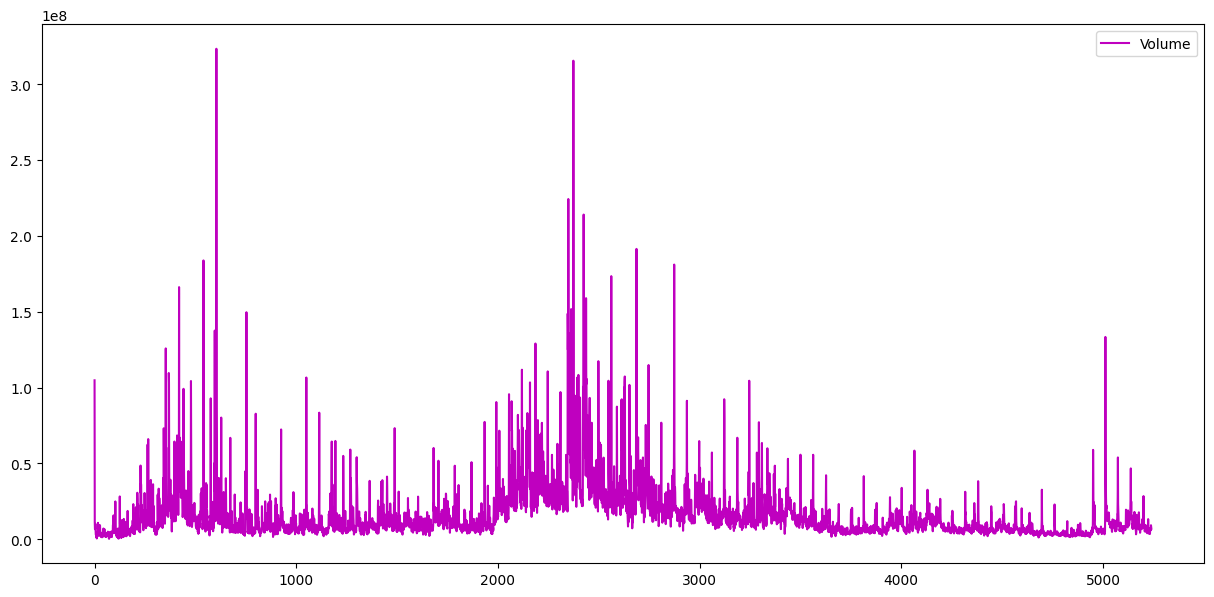

In [16]:
plt.figure(figsize=(15,7))
plt.plot(df['Volume'], color='m', label = 'Volume')
plt.legend()
plt.show()

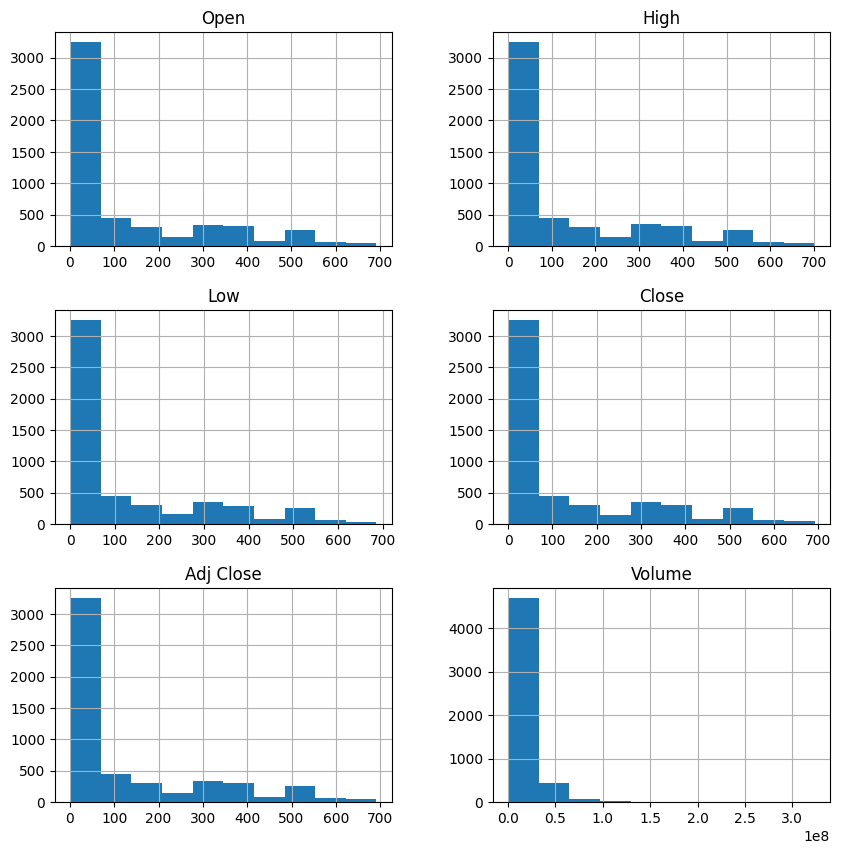

In [17]:
df.hist(figsize=(10, 10))
plt.show()

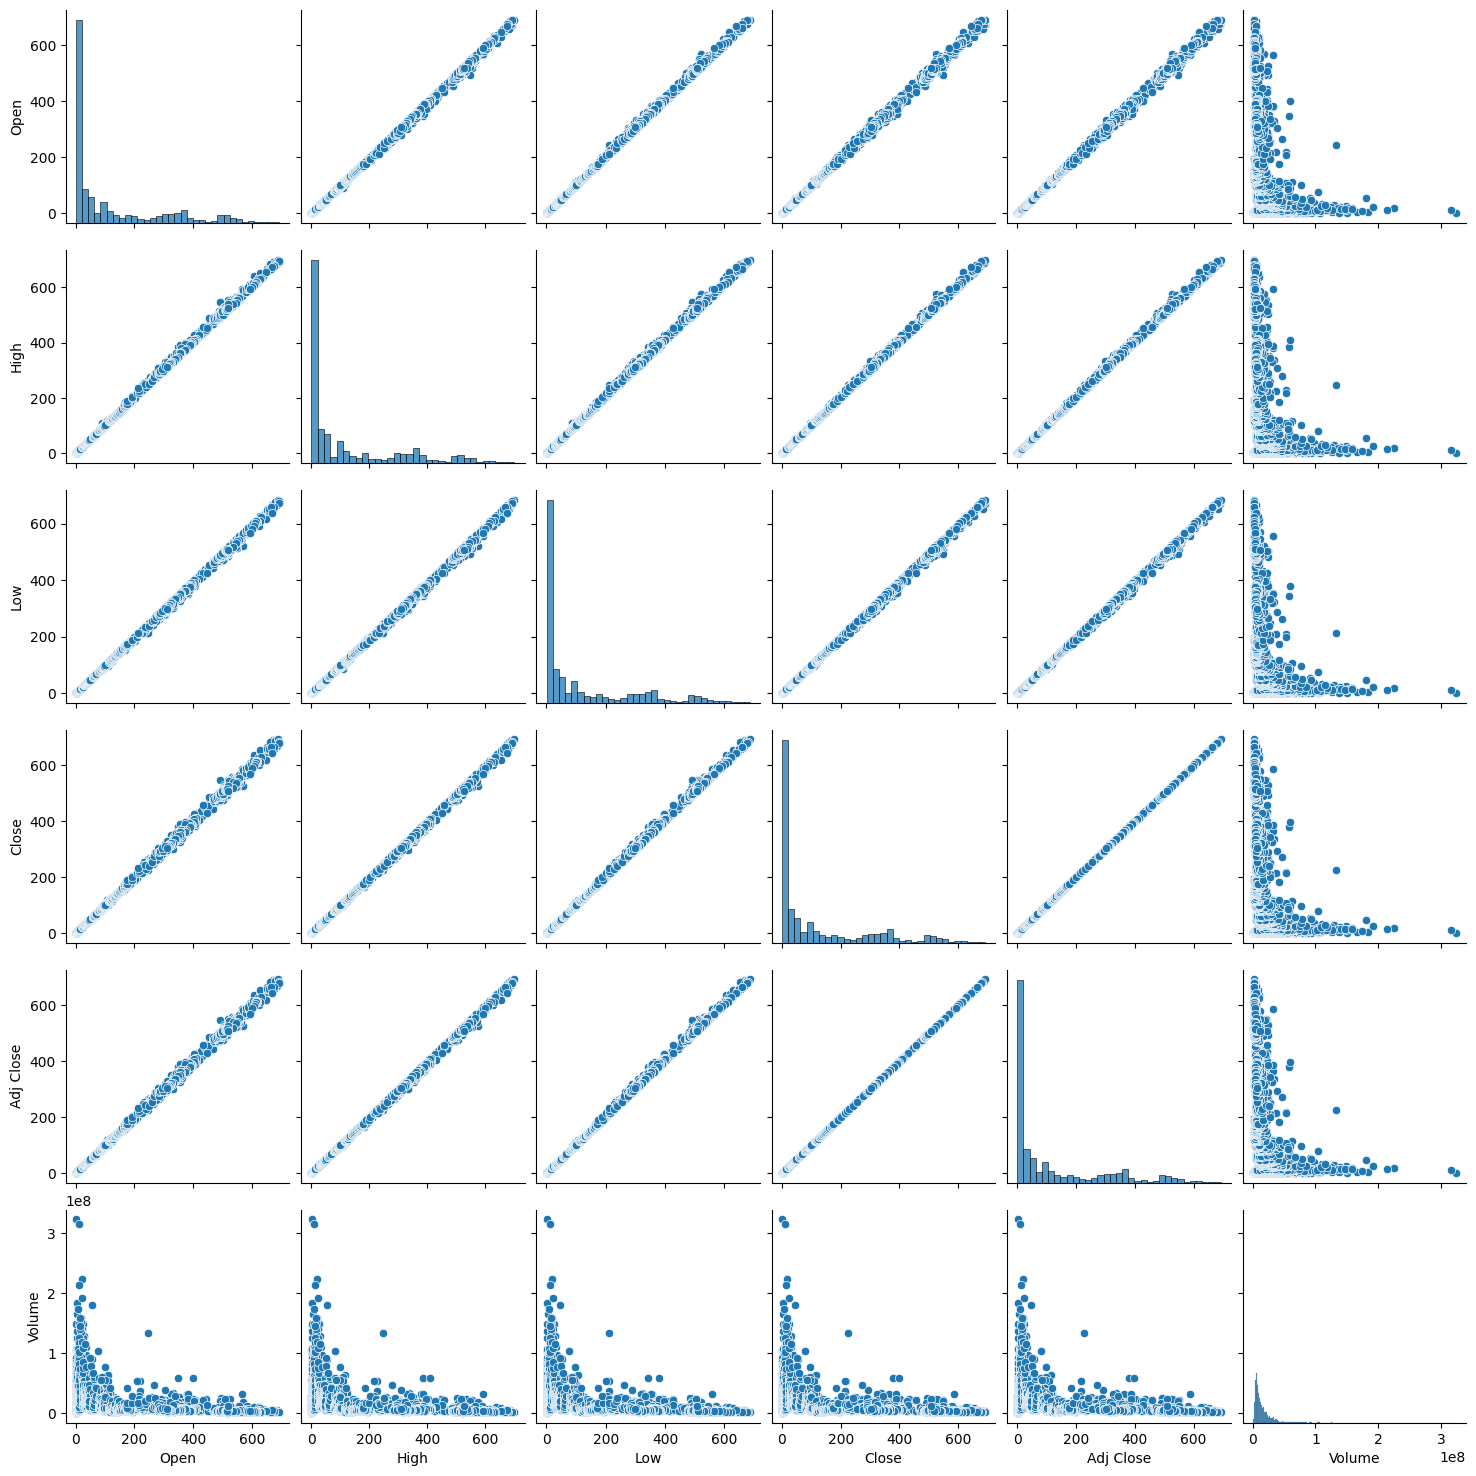

In [18]:
sns.pairplot(df)

Moving Average

https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

In [41]:
ma_tf = 10
ma = df['Adj Close'].rolling(ma_tf).mean()

In [42]:
print(ma)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5236    307.901004
5237    305.182004
5238    304.213004
5239    304.031003
5240    302.863004
Name: Adj Close, Length: 5241, dtype: float64


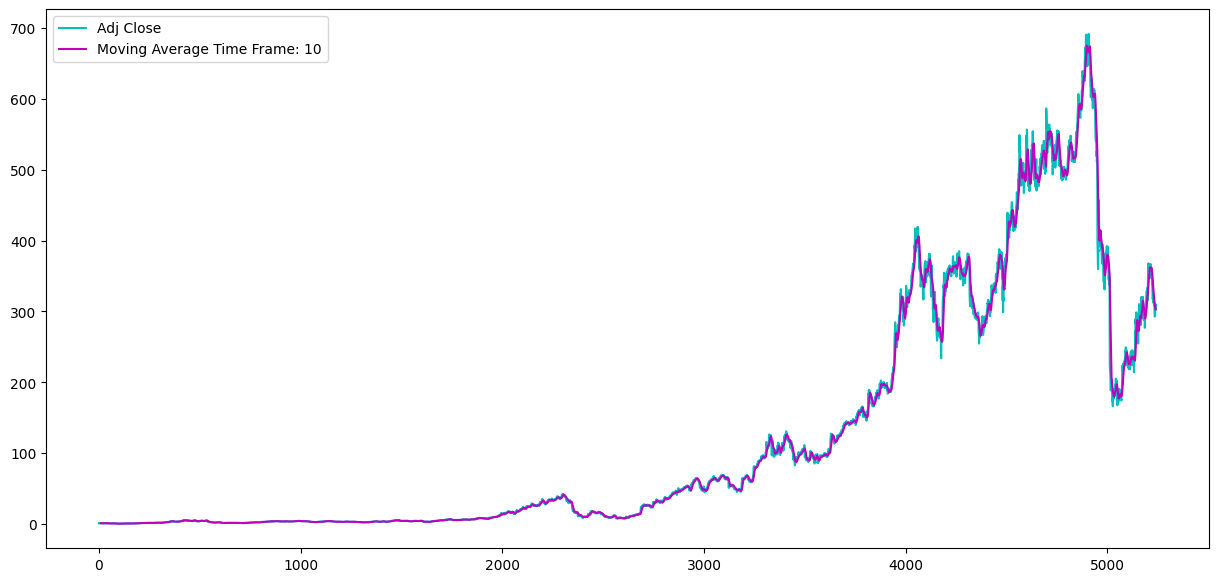

In [43]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Adj Close')
plt.plot(ma, color='m', label = 'Moving Average Time Frame: '+ str(ma_tf))
plt.legend()
plt.show()

In [44]:
ema_com = 1.5
ema = df['Adj Close'].ewm(com=ema_com).mean()


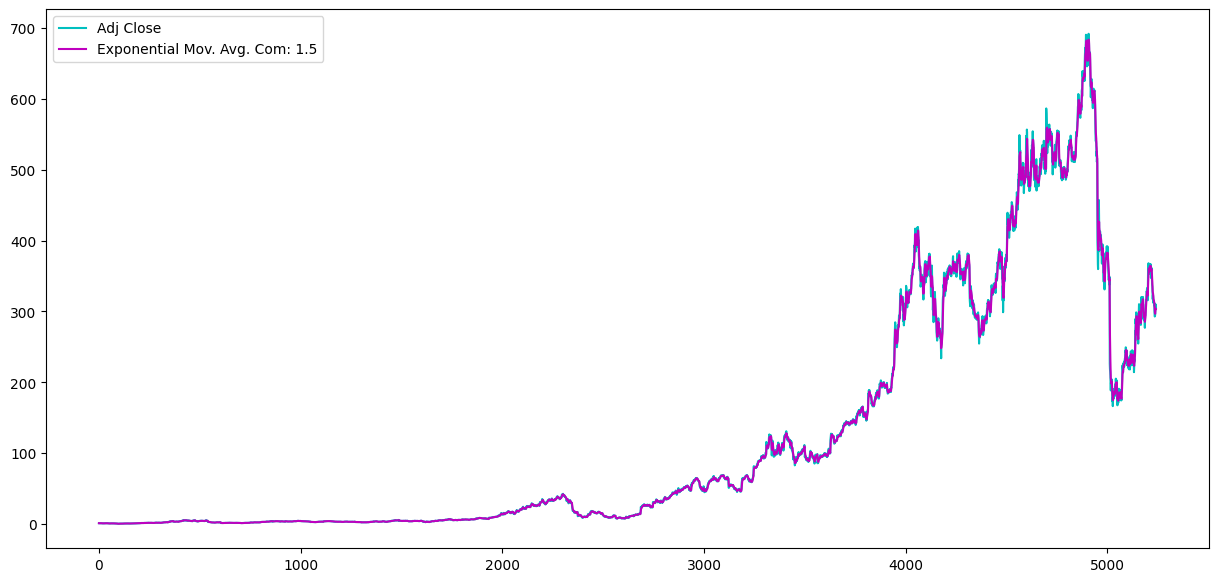

In [45]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Adj Close')
plt.plot(ema, color='m', label = 'Exponential Mov. Avg. Com: ' + str(ema_com))
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}\n')
print(f'n_lags: {result[1]}\n')
print(f'p-value: {result[1]}\n')
for key, value in result[4].items():
    print('Critial Values:\n')
    print(f'   {key}, {value}\n')

ADF Statistic: -1.191392744448107

n_lags: 0.6772873329860044

p-value: 0.6772873329860044

Critial Values:

   1%, -3.431606486780679

Critial Values:

   5%, -2.8620952361461405

Critial Values:

   10%, -2.5670655520388137



In [25]:
# np.sqrt(np.log(X)).diff()

In [26]:
df['Daily Return'] = df['Adj Close'].pct_change(fill_method='bfill')

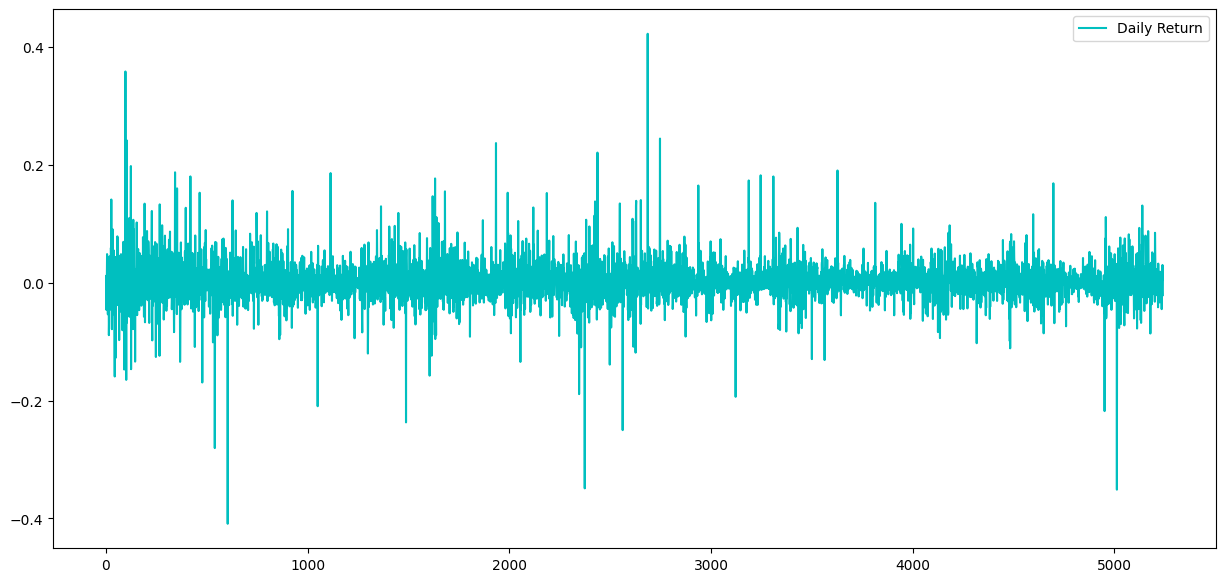

In [27]:
plt.figure(figsize=(15,7))
plt.plot(df['Daily Return'], color='c', label = 'Daily Return')
plt.legend()
plt.show()

Text(0, 0.5, 'Daily Return')

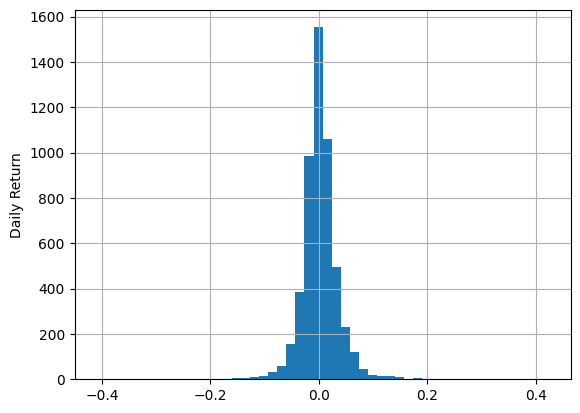

In [28]:
df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
data['Date'] = pd.to_datetime(data['Date'])

In [30]:
data = data.groupby(['Date']).sum()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0
...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0


In [31]:
data1 = df.set_index('Date')
data2 = data

In [32]:
data1

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006


In [33]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0
...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0


In [34]:
data1.loc[data1.index.intersection(data2.index)]

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006


In [35]:
data1_new = data1.loc[data1.index.intersection(data2.index)]
data2_new = data2.loc[data2.index.intersection(data1.index)]

In [36]:
data2_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0
...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0


In [37]:
total = pd.concat([data1_new, data2_new], axis = 1)

In [38]:
total

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0


In [39]:
total2 = pd.concat([data1_new, data2_new], axis = 0)

In [40]:
total2

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,NaN
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,NaN
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,NaN
